<center><h1 style="font-size:2em;color:#2467C0;font-family:Times New Roman">Tagesaufgaben 04.05.2023</h1></center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<div class="alert alert-success" role="alert">
  <h4 class="alert-heading" style="font-size:1.7em">Aufgabe 1:</h4>
  <hr>
      <h4 style="font-family:courier;font-size:1.3em">
Nutze das Datenset "mpg" aus seaborn und erstelle aus den Messdaten "horsepower" und "weight" einen Scatterplot. Identifiziere in diesem Scatterplot den Ausreißer, zeige auf diesen mit einer horizontalen (gestrichelt) und vertikalen (abwechselnd Punkte und Striche) Linie und schreibe den Namen des Autos dieses Punktes daneben. Der Name des Autos soll mit einem schwarzen Pfeil auf den genauen Punkt zeigen. Beschrifte außerdem die Achsen und Titel ordentlich.
</h4>
<hr>
</div>

In [30]:
mpg[(mpg['weight'] > 4950) & (mpg['horsepower'] > 220)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom


In [34]:
mpg[(mpg['weight'] > 4995)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
44,13.0,8,400.0,175.0,5140,12.0,71,usa,pontiac safari (sw)
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala


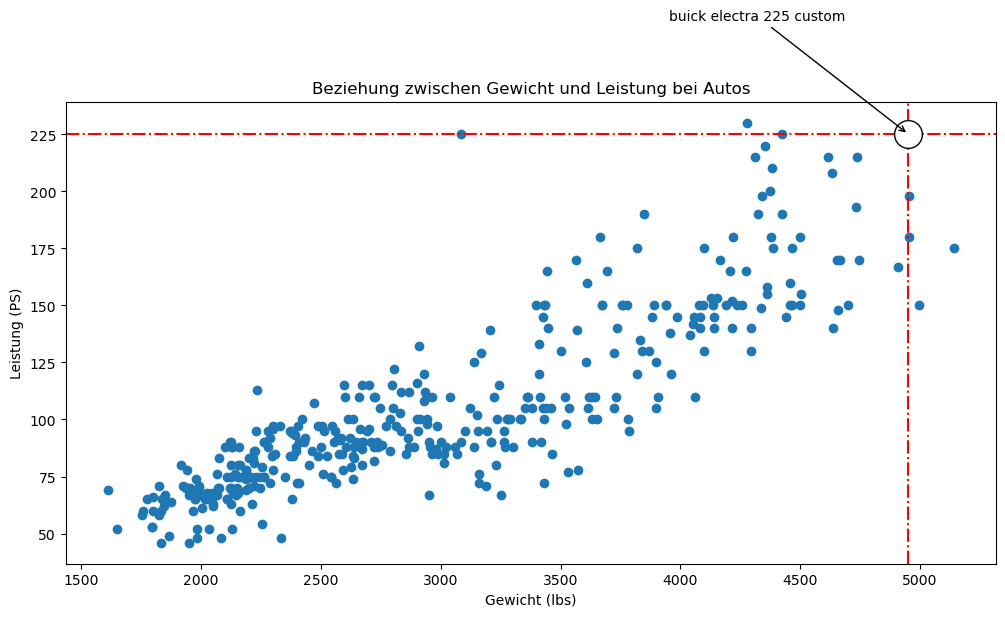

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

mpg = sns.load_dataset('mpg')

plt.figure(figsize=(12,6))
plt.scatter(x='weight', y='horsepower', data=mpg)

# Ausreißer identifizieren
outlier = mpg[(mpg['weight'] > 4950) & (mpg['horsepower'] > 220)]
car_name = outlier.iloc[0]['name']
car_hp = outlier.iloc[0]['horsepower']
car_weight = outlier.iloc[0]['weight']

# Linien zeichnen
plt.axhline(y=car_hp, linestyle='-.', color='red')
plt.axvline(x=car_weight, linestyle='-.', color='red')
plt.plot(car_weight, car_hp, marker='o', markerfacecolor='white', markersize=20, markeredgecolor='black')

# Text hinzufügen
plt.annotate(car_name, xy=(car_weight, car_hp), xytext=(car_weight-1000, car_hp+50),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('Gewicht (lbs)')
plt.ylabel('Leistung (PS)')
plt.title('Beziehung zwischen Gewicht und Leistung bei Autos')
plt.show()


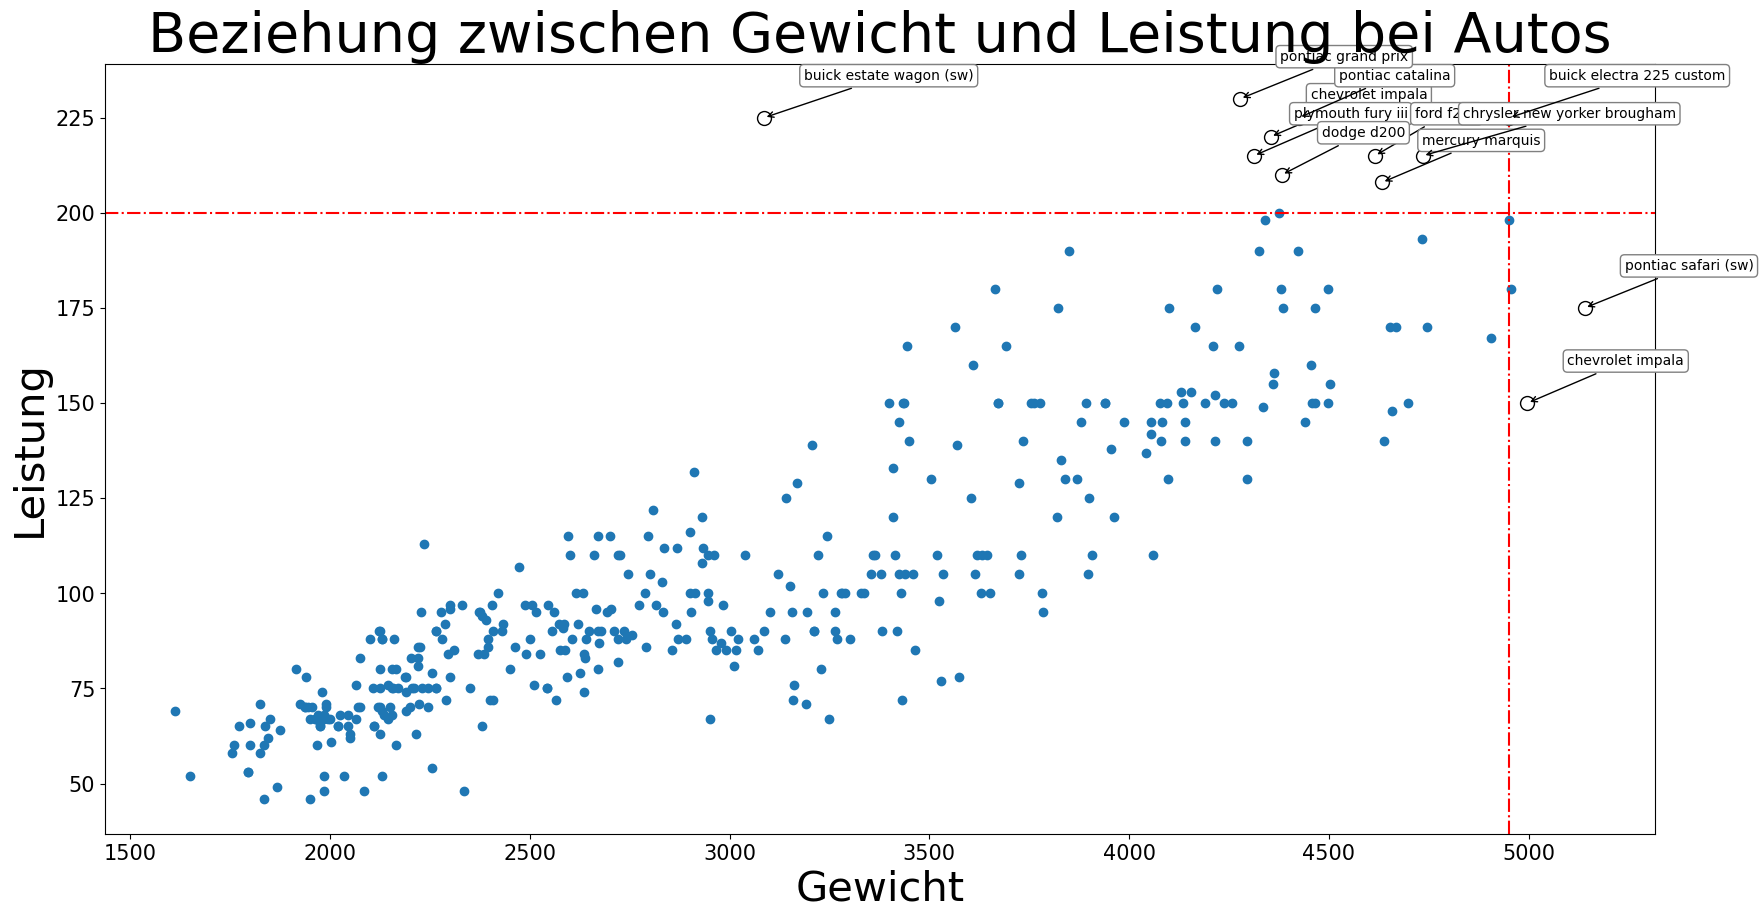

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden
mpg = sns.load_dataset('mpg')

# Scatterplot erstellen
plt.figure(figsize=(20,10))
plt.scatter(x='weight', y='horsepower', data=mpg)

# Ausreißer identifizieren
outlier_weight = mpg[(mpg['weight'] > 4995)]
outlier_hp = mpg[(mpg['horsepower'] > 200)]
outlier = pd.concat([outlier_weight, outlier_hp]).drop_duplicates()

plt.axhline(y=200, linestyle='-.', color='red')
plt.axvline(x=4950, linestyle='-.', color='red')

# Ausreißer markieren
for index, row in outlier.iterrows():
    car_name = row['name']
    car_hp = row['horsepower']
    car_weight = row['weight']
    plt.plot(car_weight, car_hp, marker='o', markerfacecolor='white', markersize=10, markeredgecolor='black')
    plt.annotate(car_name, xy=(car_weight, car_hp), xytext=(car_weight+100, car_hp+10),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 bbox=dict(boxstyle='round', fc='white', ec='grey'))

# Achsen beschriften
plt.xlabel('Gewicht', fontsize=30)
plt.ylabel('Leistung', fontsize=30 )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Titel hinzufügen
plt.title('Beziehung zwischen Gewicht und Leistung bei Autos', fontsize=40)

plt.show()


<div class="alert alert-success" role="alert">
  <h4 class="alert-heading" style="font-size:1.7em">Aufgabe 2:</h4>
  <hr>
      <h4 style="font-family:courier;font-size:1.3em">
Dir sind folgende Unternehmensdaten gegeben:<br><br>
Unternehmen: Volkswagen, Walmart, Amazon, Apple, Toyota<br>
Land: Deutschland, USA, USA, USA, Japan<br>
Umsatz VW in Mrd. Euro: 129.92<br>
Umsatz USA-Märkte in Mrd. Dollar: 523.964 (Walmart), 280.522 (Amazon), 264.983 (Apple)<br>
Umsatz Toyota in Billionen Yen: 30<br><br>
Erstelle daraus ein Balkendiagramm der 5 Unternehmen. Rechne dabei (NICHT VORHER, sondern innerhalb des set_major_formatter) die Unternehmensumsätze in € um (achte drauf, dass Unternehmen in USA von $ auf € gerechnet werden müssen, Toyota muss von Yen auf € gerechnet werden); Tipp: if/else innerhalb der def-Funktion helfen dir dabei!
Erstelle in dem Balkendiagramm passende Achsenbeschriftungen und gib die Umsätze in Mrd € auf den Ticks an.
</h4>
<hr>
</div>

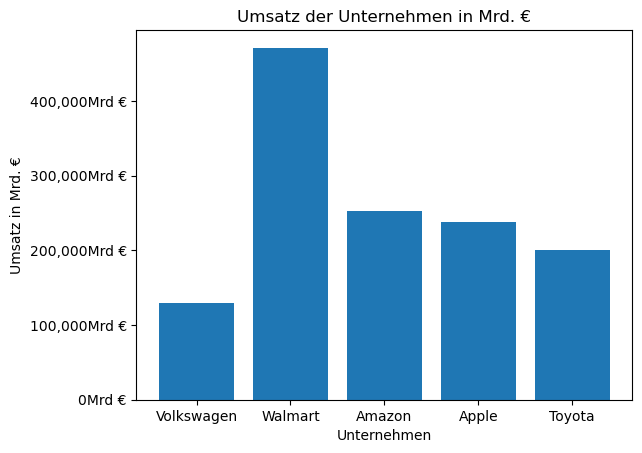

In [109]:
unternehmen = ['Volkswagen', 'Walmart', 'Amazon', 'Apple', 'Toyota']
land = ['Deutschland', 'USA', 'USA', 'USA', 'Japan']
umsatz = [129920, 523964, 280522, 264983, 30000000]
umsatz_euro = []
for i in range(len(umsatz)):
    if land[i] == 'Deutschland':
        umsatz_euro.append(umsatz[i])
    elif land[i] == 'USA':
        umsatz_euro.append(umsatz[i] * 0.90)  # Wechselkurs USD/EUR (Stand Mai 2023)
    elif land[i] == 'Japan':
        umsatz_euro.append(umsatz[i] * 0.0067)  # Wechselkurs JPY/EUR (Stand Mai 2023)
fig, ax = plt.subplots()
ax.bar(unternehmen, umsatz_euro)
ax.set_xlabel('Unternehmen')
ax.set_ylabel('Umsatz in Mrd. €')
ax.set_title('Umsatz der Unternehmen in Mrd. €')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}Mrd €".format(int(x))))
plt.show()
